In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'C:\Users\Administrator\Downloads\Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# remove first column because it's a serial no. and have no impact on data.
df.drop("Serial No.",axis=1,inplace=True)

In [5]:
# now data look like this
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# checking missing or null values in data
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# get statiscal  information of a dataset
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


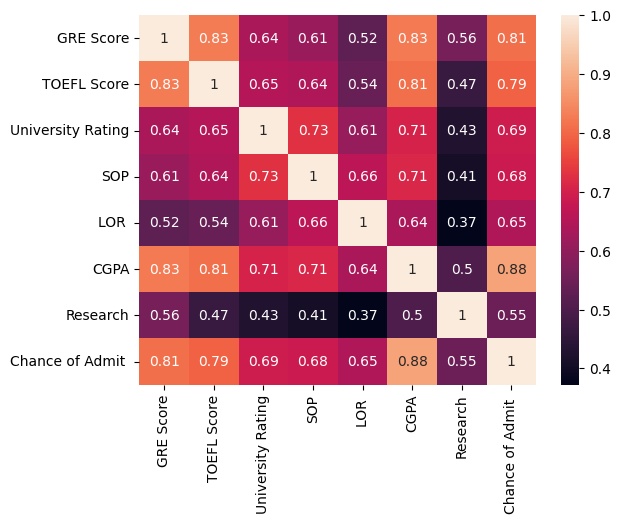

In [8]:
# co-relation of all columns
corrplt = df.corr()
sns.heatmap(corrplt, annot=True)
plt.show()

In [9]:
# from co-relation we got  the following information:
# these three columns highly impact on Admission 
#                                                 GRE SCORE   : 0.81
#                                                 TOEFL SCORE : 0.79
#                                                 CGPA        : 0.88

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Chance of Admit ']), df['Chance of Admit '], test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
# x-axis  relation
model.coef_

array([0.00243444, 0.00299587, 0.0025688 , 0.00181369, 0.01723798,
       0.11252708, 0.02402679])

In [13]:
# from above model.coef_
#Equation is :
#          ADMISSSION_Prediction = 0.00243444 GRE_Score + 0.00299587 TOEFL_Score + 0.0025688 University_Rating + 0.00181369 SOP + 0.01723798 LOR + 0.11252708 CGPA + 0.02402679 Research
# y axis relation
model.intercept_

-1.421447071901647

In [14]:
# from above model.intercept_
#Equation is :
#          ADMISSSION_Prediction = -1.421447071901647 + 0.00243444 GRE_Score + 0.00299587 TOEFL_Score + 0.0025688 University_Rating + 0.00181369 SOP + 0.01723798 LOR + 0.11252708 CGPA + 0.02402679 Research
# y axis rel
predct = model.predict(X_test)
r2_score=r2_score(y_test, predct)
print("Predction of Admission is:", r2_score * 100)

Predction of Admission is: 81.88432567829629
